In [1]:
using LinearAlgebra, Plots

Vamos considerar a tabela do Exercício 3 da Seção 8.1 do Burden, e aproximá-la por um poliômio $g$ de grau menor ou igual a 3 de forma a minimizar o erro qudrático
$$
\sqrt{\sum_{i=1}^6 [y_i - g(x_i)]^2},
$$
onde $y_i = f(x_i)$ para alguma função $f$.

Podemos associar a expressão para o erro quadrático ao produto interno
$$
\langle u, v\rangle = \sum_{i=1}^6 u(x_i)v(x_i)
$$
pois nesse caso
$$
\langle u-v, u-v\rangle = \sum_{i=1}^6 [u(x_i) - v(x_i)]^2.
$$

Como um polinômio de grau menor ou igual 3 pode ser escrito na forma
$$
g(x) = a_0 + a_1x + a_2x^2 + a_3x^3
$$
podemos usar para a construção do sistema normal as funções
$$
g_0(x) = 1, \ g_1(x) = x, \  g_2(x) = x^2 \ \text{e } g_3(x) = x^3 \ (m+1 = 4)
$$

In [2]:
# Dados
x = [1.0; 1.1; 1.3; 1.5; 1.9; 2.1]
y = [1.84; 1.96; 2.21; 2.45; 2.94; 3.18]
[x y]

6×2 Array{Float64,2}:
 1.0  1.84
 1.1  1.96
 1.3  2.21
 1.5  2.45
 1.9  2.94
 2.1  3.18

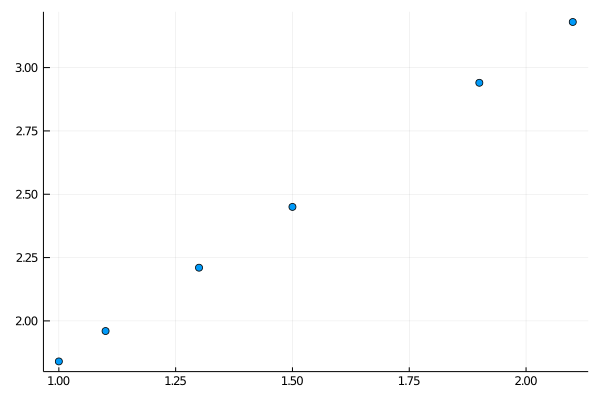

In [3]:
# Figura com os dados
scatter(x, y, legend=false)

In [4]:
# Valores das funções g_j nos pontos x_i
g0 = ones(6); g1 = x; g2 = x.^2; g3 = x.^3
M=[g0 g1 g2 g3]

6×4 Array{Float64,2}:
 1.0  1.0  1.0   1.0
 1.0  1.1  1.21  1.331
 1.0  1.3  1.69  2.197
 1.0  1.5  2.25  3.375
 1.0  1.9  3.61  6.859
 1.0  2.1  4.41  9.261

Com o produto interno definido acima, a matriz do sistema normal coincide com $M^TM$ e o lado direito do sistema normal coincide com $M^Ty$.

In [5]:
# Matriz e lado direito do sistema normal
A = M'*M; b = M'*y
[A b]

4×5 Array{Float64,2}:
  6.0     8.9     14.17     24.023   14.58
  8.9    14.17    24.023    42.8629  22.808
 14.17   24.023   42.8629   79.5192  38.0962
 24.023  42.8629  79.5192  151.801   67.1883

In [6]:
# Solução do sistema normal
a = A\b

4-element Array{Float64,1}:
  0.6290192776395338
  1.1850097957342056
  0.03533252044382126
 -0.010047232342362707

In [7]:
# Polinômio de grau 3 que ajusta a tabela
g(x) = a[1] + a[2]*x + a[3]*x^2 + a[4]*x^3

g (generic function with 1 method)

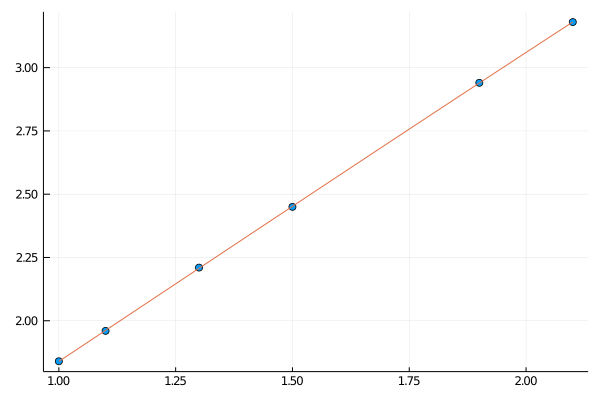

In [8]:
xx = collect(1.0:0.001:2.1) # Pontos para desenhar o gráfico de g
plot!(xx, g.(xx)) # gráfico de g mais os pontos da tabela